In [1]:
# prompt: import basic libraries for eda and nural network

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_csv('/content/drive/MyDrive/Colab_Files/Data_CHF_Zhao_2020_ATE.csv',)
df = df.drop(['id'],axis=1)
df

,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,Inasaka,tube,0.39,5600,-0.1041,3.0,3.0,100,11.3
1,Inasaka,tube,0.31,6700,-0.0596,3.0,3.0,100,10.6
2,Inasaka,tube,0.33,4300,-0.0395,3.0,3.0,100,7.3
3,Inasaka,tube,0.62,6400,-0.1460,3.0,3.0,100,12.8
4,Inasaka,tube,0.64,4700,-0.0849,3.0,3.0,100,11.0
...,...,...,...,...,...,...,...,...,...
1860,Richenderfer,plate,1.01,1500,-0.0218,15.0,120.0,10,9.4
1861,Richenderfer,plate,1.01,1500,-0.0434,15.0,120.0,10,10.4
1862,Richenderfer,plate,1.01,2000,-0.0109,15.0,120.0,10,10.8
1863,Richenderfer,plate,1.01,2000,-0.0218,15.0,120.0,10,10.9


In [3]:
# prompt: eda of the data

df.describe()


,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
count,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000
mean,10.010949,2862.647721,0.016179,9.417212,16.167721,911.340483,3.854638
std,4.282715,1656.412247,0.117575,6.333807,21.182870,726.718974,1.985535
min,0.100000,0.000000,-0.866700,1.000000,1.000000,10.000000,0.800000
25%,6.890000,1519.000000,-0.048300,5.600000,5.600000,432.000000,2.400000
50%,10.340000,2590.000000,0.024400,8.500000,10.300000,625.000000,3.500000
75%,13.790000,3933.000000,0.100600,11.100000,15.200000,1778.000000,4.800000
max,20.680000,7975.000000,0.232000,37.500000,120.000000,3048.000000,19.300000


In [4]:
df.isnull().sum()

author                 0
geometry               0
pressure [MPa]         0
mass_flux [kg/m2-s]    0
x_e_out [-]            0
D_e [mm]               0
D_h [mm]               0
length [mm]            0
chf_exp [MW/m2]        0
dtype: int64

array([[<Axes: title={'center': 'pressure [MPa]'}>,
        <Axes: title={'center': 'mass_flux [kg/m2-s]'}>,
        <Axes: title={'center': 'x_e_out [-]'}>],
       [<Axes: title={'center': 'D_e [mm]'}>,
        <Axes: title={'center': 'D_h [mm]'}>,
        <Axes: title={'center': 'length [mm]'}>],
       [<Axes: title={'center': 'chf_exp [MW/m2]'}>, <Axes: >, <Axes: >]],
      dtype=object)

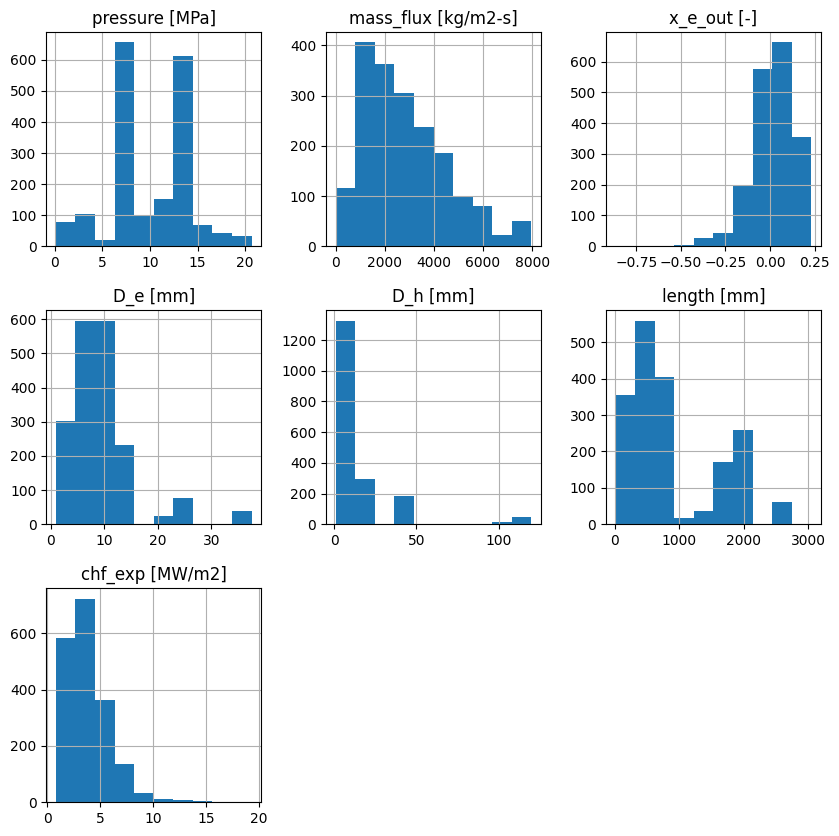

In [5]:
# prompt: eda of the data

df.hist(figsize=(10,10))

In [6]:
# Define the new column names
new_column_names = ['author', 'geometry', 'pressure', 'mass_flux', 'exit_concentration', 'equivalent_diameter', 'hydraulic_diameter', 'channel_length', 'exp_critical_heat_flux']

# Replace the column names wrt to df
df.columns = new_column_names

In [8]:
summary_stats = df.describe(include='all').T
summary_stats

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
author,1865,10,Thompson,1202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geometry,1865,3,tube,1439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pressure,1865.0,NaN,NaN,NaN,10.010949,4.282715,0.1,6.89,10.34,13.79,20.68
mass_flux,1865.0,NaN,NaN,NaN,2862.647721,1656.412247,0.0,1519.0,2590.0,3933.0,7975.0
exit_concentration,1865.0,NaN,NaN,NaN,0.016179,0.117575,-0.8667,-0.0483,0.0244,0.1006,0.232
equivalent_diameter,1865.0,NaN,NaN,NaN,9.417212,6.333807,1.0,5.6,8.5,11.1,37.5
hydraulic_diameter,1865.0,NaN,NaN,NaN,16.167721,21.18287,1.0,5.6,10.3,15.2,120.0
channel_length,1865.0,NaN,NaN,NaN,911.340483,726.718974,10.0,432.0,625.0,1778.0,3048.0
exp_critical_heat_flux,1865.0,NaN,NaN,NaN,3.854638,1.985535,0.8,2.4,3.5,4.8,19.3


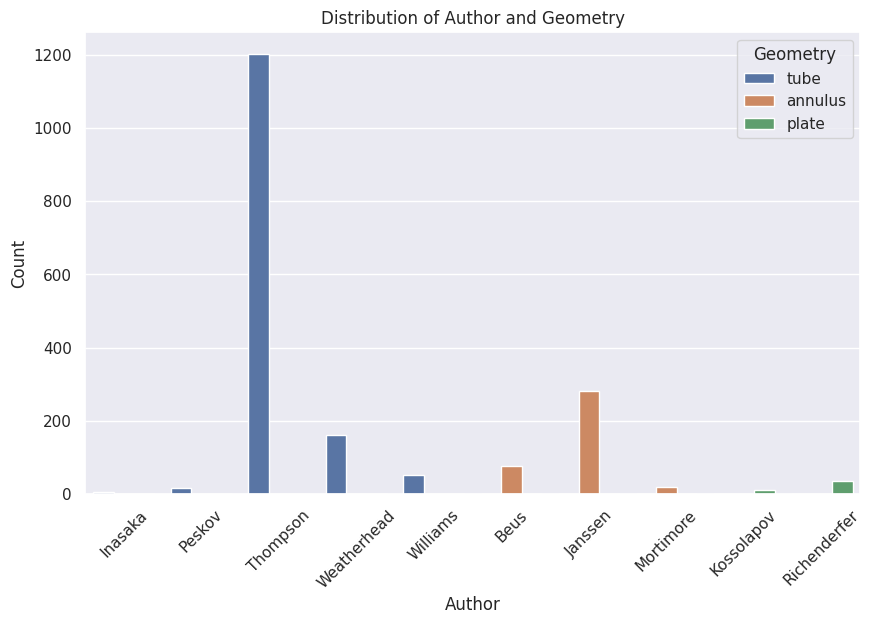

In [11]:
# Create a count plot using seaborn
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='author', hue='geometry')
plt.title('Distribution of Author and Geometry')
plt.xlabel('Author')
plt.ylabel('Count')
plt.legend(title='Geometry')
plt.xticks(rotation=45)
plt.show()



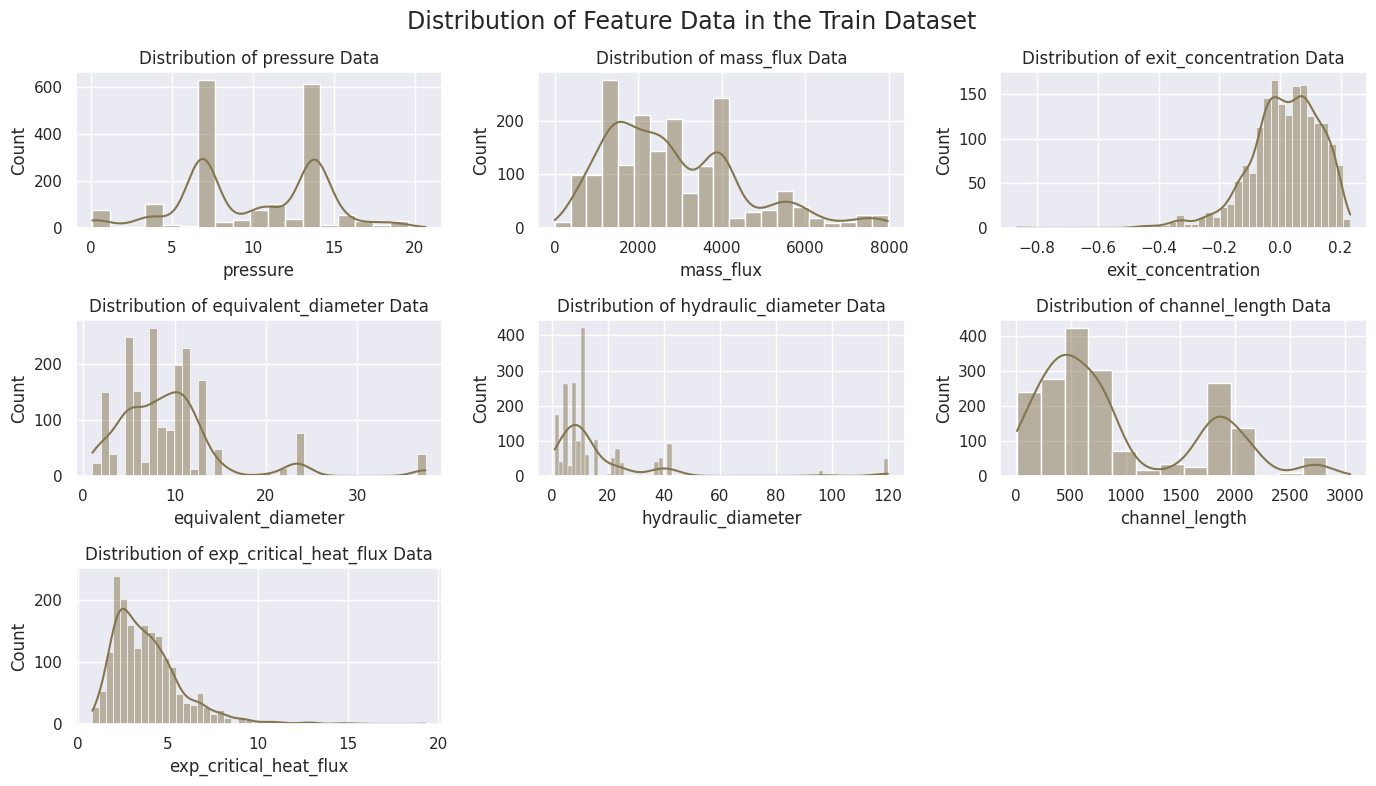

In [13]:
plt.figure(figsize=(14, 10))

# Add a centered title to the figure
plt.suptitle("Distribution of Feature Data in the Train Dataset", fontsize=17)

# Make a copy of the data DataFrame
data_plot = df.copy()

# Drop the specified columns from the data_plot DataFrame
columns_to_drop = ['author', 'geometry']
data_plot = data_plot.drop(columns_to_drop, axis=1)

# Loop over each column in the data_plot DataFrame and create a histogram subplot
for i, col in enumerate(data_plot.columns, 1):
    # Set the subplot to be in the i-th position in a 4x3 grid of subplots
    plt.subplot(4, 3, i)
    # Set the title of the subplot to be the name of the current column
    plt.title(f"Distribution of {col} Data")
    # Create a histogram of the values in the current column with a KDE line
    sns.histplot(data_plot[col], kde=True, color='#83764F')

# Adjust the spacing between the subplots to make them fit nicely in the figure
plt.tight_layout()

# Display the figure
plt.show()

In [15]:
def display_data_heatmap(data):
    corr = df.corr()
    cmap = 'viridis'
    title = 'Feature Correlation for train_df'

    plt.figure(figsize=(14, 10))
    sns.heatmap(np.abs(corr), cmap=cmap, annot=True)
    plt.title('Feature Correlation of data')
    plt.show()

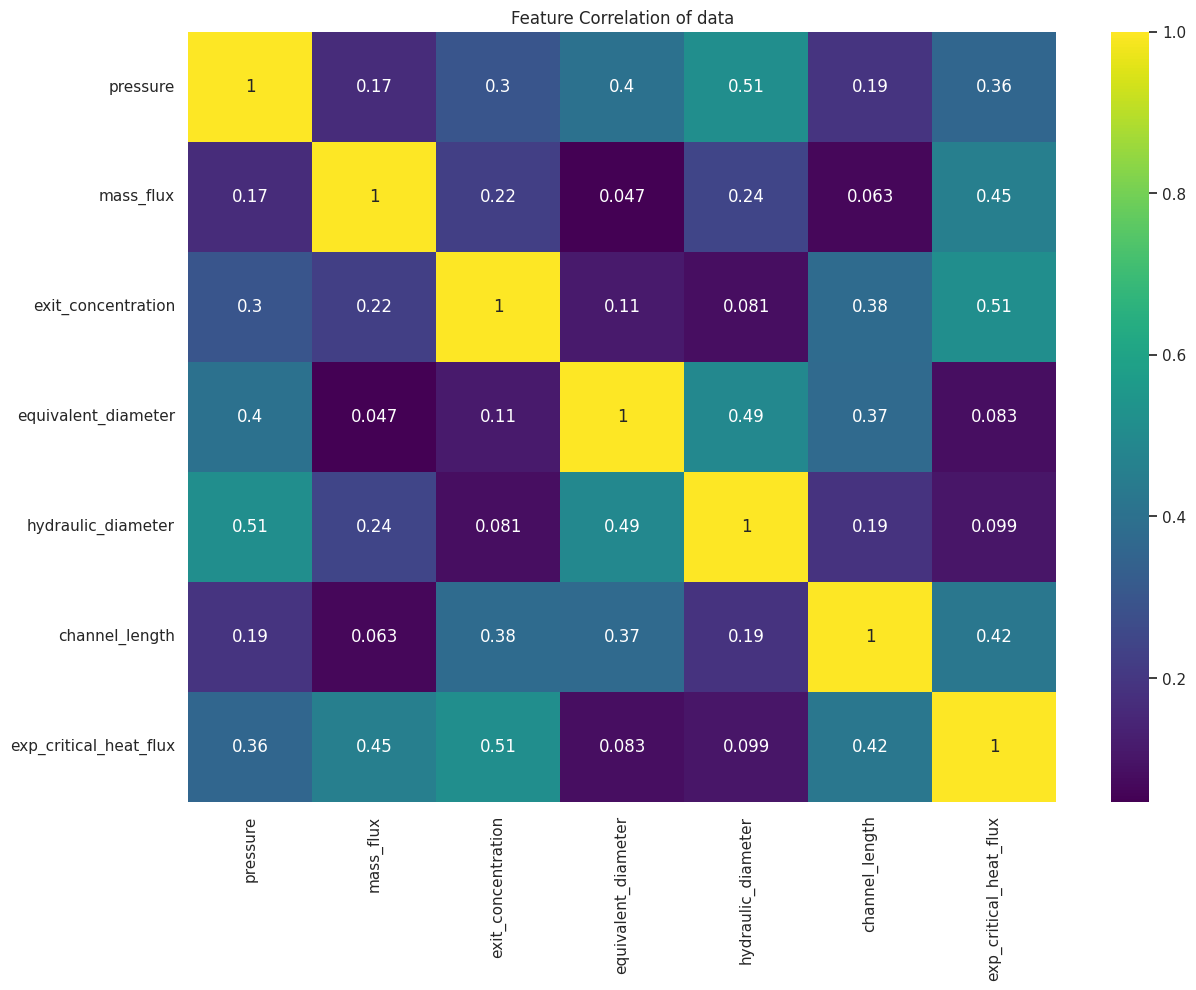

In [16]:
display_data_heatmap(df)

In [23]:

import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

import re

In [20]:
df.columns

Index(['author', 'geometry', 'pressure', 'mass_flux', 'exit_concentration',
       'equivalent_diameter', 'hydraulic_diameter', 'channel_length',
       'exp_critical_heat_flux'],
      dtype='object')

In [24]:
# Select the relevant columns from the DataFrame
columns = ['pressure', 'mass_flux', 'equivalent_diameter', 'hydraulic_diameter', 'channel_length',
       'exp_critical_heat_flux', 'exit_concentration']
subset_df = df[columns]

# Create scatter plots with regression lines using Plotly Express
fig = sp.make_subplots(rows=3, cols=2, subplot_titles=columns[:-1])

for i, col in enumerate(columns[:-1]):
    row = i // 2 + 1
    col = i % 2 + 1
    scatter = px.scatter(subset_df, x='exit_concentration', y=columns[i], trendline='ols')
    fig.add_trace(scatter.data[0], row=row, col=col)

    # Set x-axis title
    fig.update_xaxes(title_text='exit_concentration', row=row, col=col)

# Update layout
fig.update_layout(
    title='Regression Plots: Relationships between exit_concentration and Other Columns',
    showlegend=False,
    height=800,  # Adjust the height as needed
)

# Display the plot
fig.show()

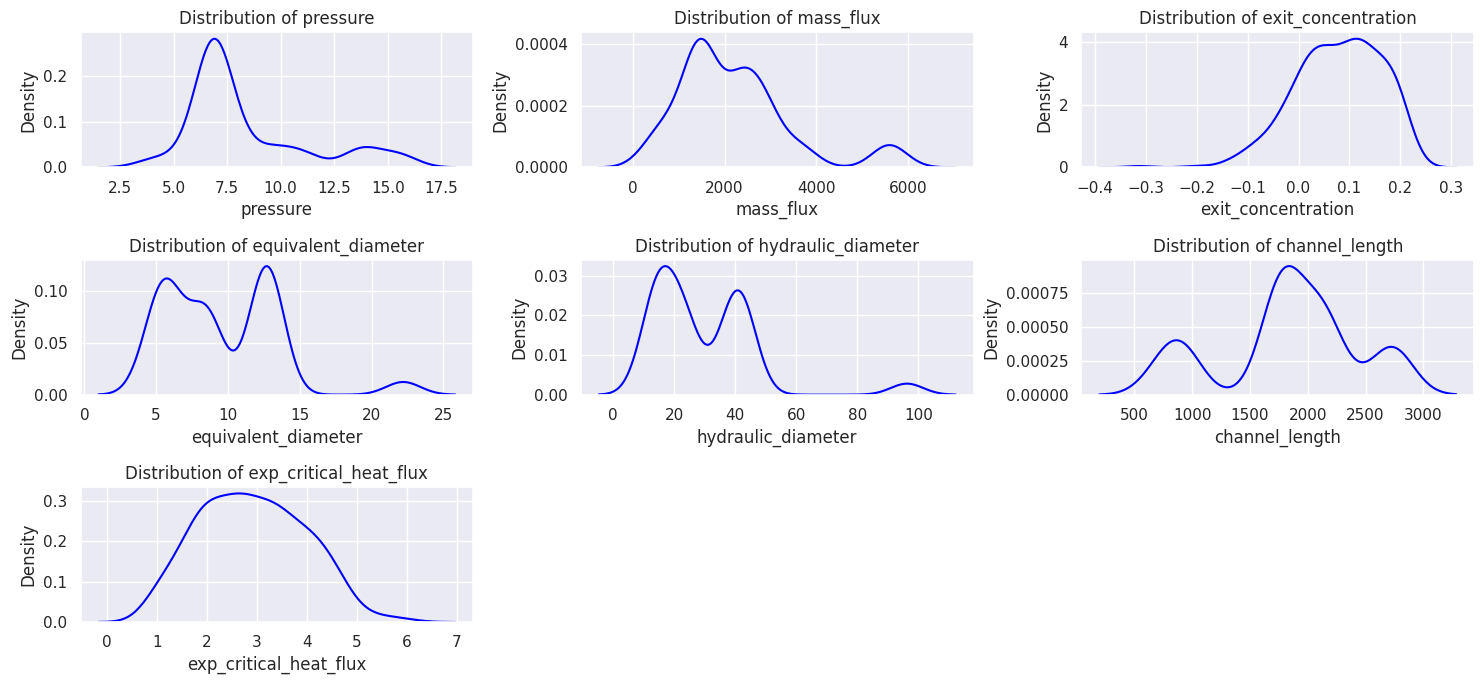

In [25]:
Annulus = df[df['geometry']=='annulus']
# check the distribution of the dataset with respect to each geometry

plt.figure(figsize=(15, 7))
for i, feature in enumerate(Annulus.iloc[:,2:]):
    plt.subplot(3, 3, i + 1)
    sns.distplot(Annulus[feature], color='blue', hist=False, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

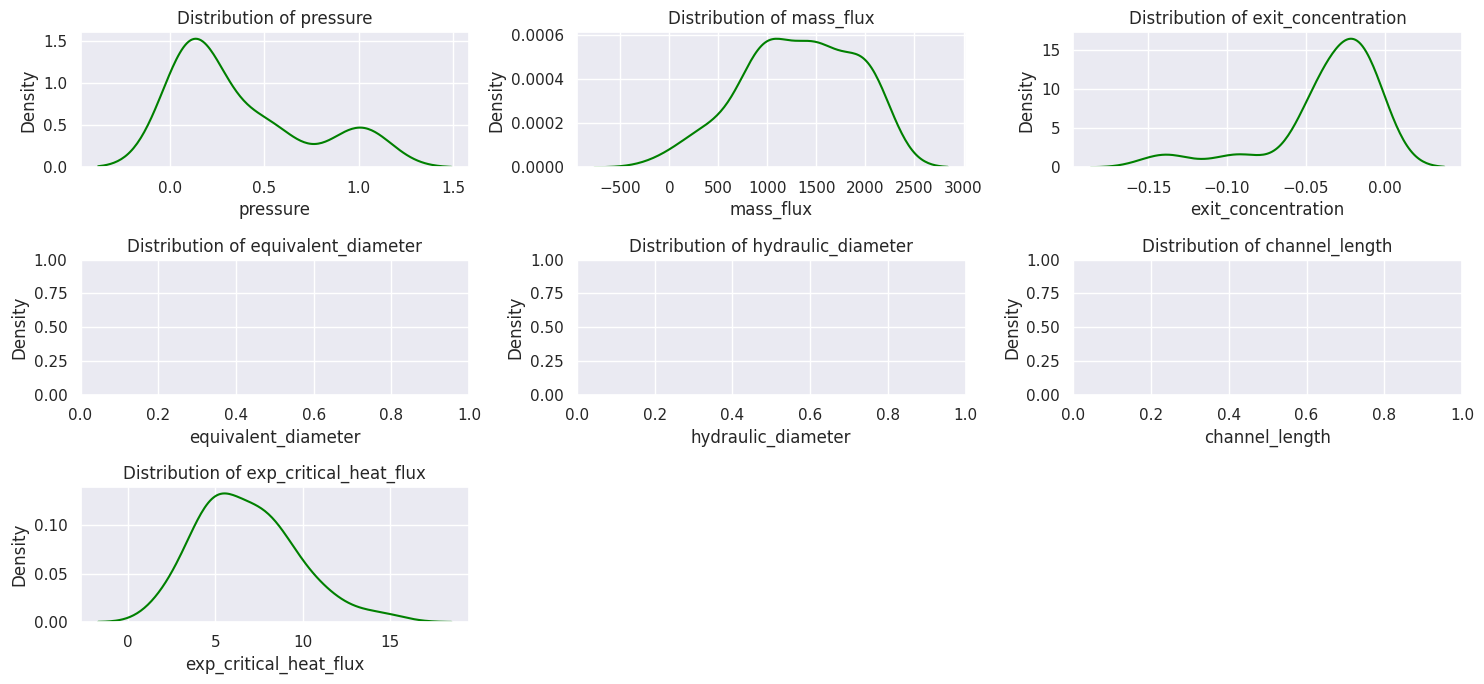

In [26]:
Plate = df[df['geometry']=='plate']
# check the distribution of the dataset with respect to each geometry

plt.figure(figsize=(15, 7))
for i, feature in enumerate(Plate.iloc[:,2:]):
    plt.subplot(3, 3, i + 1)
    sns.distplot(Plate[feature], color='green', hist=False, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder
# Apply label encoding to 'author' and 'geometry' columns
label_encoder = LabelEncoder()
df['author'] = label_encoder.fit_transform(df['author'])
df['geometry'] = label_encoder.fit_transform(df['geometry'])

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [29]:
# import the neccesary libraries for the neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# from livelossplot import PlotLossesKerasTF

# Split the data into features and target variable
X = df.drop('exp_critical_heat_flux', axis=1)
y = df['exp_critical_heat_flux']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation ='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3201 (12.50 KB)
Trainable params: 3201 (12.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

In [32]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)

# Calculate the metrics
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)
print("Mean Square Error:",mse)
print("Root Mean Square Error:",np.sqrt(mse))

12/12 [==============================] - 0s 2ms/step
R2 Score: 0.8944472810036486
Mean Square Error: 0.4533043980715652
Root Mean Square Error: 0.6732788412474917


In [33]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)

# Calculate the metrics
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)
print("Mean Square Error:",mse)
print("Root Mean Square Error:",np.sqrt(mse))

12/12 [==============================] - 0s 3ms/step
R2 Score: 0.8944472810036486
Mean Square Error: 0.4533043980715652
Root Mean Square Error: 0.6732788412474917


In [34]:
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
47/47 - 0s - loss: 0.2380 - 159ms/epoch - 3ms/step
Epoch 2/100
47/47 - 0s - loss: 0.2284 - 104ms/epoch - 2ms/step
Epoch 3/100
47/47 - 0s - loss: 0.2257 - 83ms/epoch - 2ms/step
Epoch 4/100
47/47 - 0s - loss: 0.2263 - 101ms/epoch - 2ms/step
Epoch 5/100
47/47 - 0s - loss: 0.2428 - 212ms/epoch - 5ms/step
Epoch 6/100
47/47 - 0s - loss: 0.2576 - 305ms/epoch - 6ms/step
Epoch 7/100
47/47 - 0s - loss: 0.2525 - 260ms/epoch - 6ms/step
Epoch 8/100
47/47 - 0s - loss: 0.2186 - 300ms/epoch - 6ms/step
Epoch 9/100
47/47 - 0s - loss: 0.2238 - 296ms/epoch - 6ms/step
Epoch 10/100
47/47 - 0s - loss: 0.2286 - 303ms/epoch - 6ms/step
Epoch 11/100
47/47 - 0s - loss: 0.2188 - 169ms/epoch - 4ms/step
Epoch 12/100
47/47 - 0s - loss: 0.2365 - 134ms/epoch - 3ms/step
Epoch 13/100
47/47 - 0s - loss: 0.2297 - 156ms/epoch - 3ms/step
Epoch 14/100
47/47 - 0s - loss: 0.2124 - 141ms/epoch - 3ms/step
Epoch 15/100
47/47 - 0s - loss: 0.2149 - 146ms/epoch - 3ms/step
Epoch 16/100
47/47 - 0s - loss: 0.2429 - 166ms/epo

In [35]:
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)

# Calculate the metrics
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)
print("Mean Square Error:",mse)
print("Root Mean Square Error:",np.sqrt(mse))

12/12 [==============================] - 0s 6ms/step
R2 Score: 0.9160418708861741
Mean Square Error: 0.3605647447364495
Root Mean Square Error: 0.600470436188535


In [37]:
from keras.layers import Dropout
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                576       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3201 (12.50 KB)
Trainable params: 3201 (

In [38]:
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

In [39]:
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error and r2 score
mse = mean_squared_error(y_test, y_pred)

# Calculate the metrics
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)
print("Mean Square Error:",mse)
print("Root Mean Square Error:",np.sqrt(mse))

12/12 [==============================] - 0s 2ms/step
R2 Score: 0.8529481510808886
Mean Square Error: 0.6315256536583649
Root Mean Square Error: 0.7946858836410553
